In [1]:
# importing the preprocessed file RandomForest_R file
# Done the preprocessing using R
sales_df <-read.csv("R_preprocessed_kc_house_data.csv")

In [2]:
head(sales_df)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,day
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650,2014,10,13
2,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639,2014,12,9
3,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062,2015,2,25
4,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000,2014,12,9
5,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503,2015,2,18
6,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,2238,6819,2014,6,27


In [3]:
summary(sales_df)

     price            bedrooms        bathrooms      sqft_living   
 Min.   :  78000   Min.   : 0.000   Min.   :0.000   Min.   :  370  
 1st Qu.: 315000   1st Qu.: 3.000   1st Qu.:1.500   1st Qu.: 1400  
 Median : 440000   Median : 3.000   Median :2.250   Median : 1850  
 Mean   : 518169   Mean   : 3.353   Mean   :2.081   Mean   : 2001  
 3rd Qu.: 624975   3rd Qu.: 4.000   3rd Qu.:2.500   3rd Qu.: 2440  
 Max.   :7700000   Max.   :33.000   Max.   :8.000   Max.   :12050  
    sqft_lot           floors       waterfront            view       
 Min.   :    520   Min.   :1.00   Min.   :0.000000   Min.   :0.0000  
 1st Qu.:   4949   1st Qu.:1.00   1st Qu.:0.000000   1st Qu.:0.0000  
 Median :   7210   Median :1.00   Median :0.000000   Median :0.0000  
 Mean   :   8264   Mean   :1.49   Mean   :0.004635   Mean   :0.2098  
 3rd Qu.:   9576   3rd Qu.:2.00   3rd Qu.:0.000000   3rd Qu.:0.0000  
 Max.   :1164794   Max.   :3.50   Max.   :1.000000   Max.   :4.0000  
   condition         grade        

In [4]:
X <- sales_df[, !names(sales_df) %in% "price"]
y <- sales_df$price


In [5]:

library(caret)
library(data.table)

set.seed(42)
split <- createDataPartition(y, p = 0.7, list = FALSE)
X_train <- X[split, ]
X_test <- X[-split, ]
y_train <- y[split]
y_test <- y[-split]

# Scale the features
preProcValues <- preProcess(X_train, method = c("center", "scale"))
X_train_scaled <- predict(preProcValues, X_train)
X_test_scaled <- predict(preProcValues, X_test)


Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Loading required package: lattice



In [6]:
# Initializing Regression model
lr_model <- lm(y_train ~ ., data = as.data.frame(X_train_scaled))

summary(lr_model)



Call:
lm(formula = y_train ~ ., data = as.data.frame(X_train_scaled))

Residuals:
     Min       1Q   Median       3Q      Max 
-1002456  -101920    -9750    85048  2876639 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     518208       1641 315.822  < 2e-16 ***
bedrooms        -31044       2171 -14.299  < 2e-16 ***
bathrooms        27461       2992   9.180  < 2e-16 ***
sqft_living     128349       4601  27.897  < 2e-16 ***
sqft_lot         -1948       1816  -1.073  0.28327    
floors           10792       2579   4.185 2.87e-05 ***
waterfront       39596       1760  22.501  < 2e-16 ***
view             26752       1917  13.953  < 2e-16 ***
condition        13729       1832   7.492 7.19e-14 ***
grade           141336       2825  50.024  < 2e-16 ***
sqft_above       -8691       4092  -2.124  0.03368 *  
sqft_basement       NA         NA      NA       NA    
yr_built       -103962       2368 -43.911  < 2e-16 ***

In [7]:

y_pred_lr <- predict(lr_model, newdata = as.data.frame(X_test_scaled))

mse_lr <- mean((y_test - y_pred_lr)^2)
r_squared_lr <- 1 - sum((y_test - y_pred_lr)^2) / sum((y_test - mean(y_test))^2)

print(paste("Linear Regression Mean Squared Error:", mse_lr))
print(paste("Linear Regression R-squared:", r_squared_lr))


[1] "Linear Regression Mean Squared Error: 37324291215.536"
[1] "Linear Regression R-squared: 0.662151320236697"


In [8]:
library(Metrics)

#  RMSE
rmse_lr<- sqrt(mse_lr)
#  MAE
mae_lr<- mae(y_test,y_pred_lr)

print(paste("Root Mean Squared Error (RMSE):", rmse_lr))
print(paste("Mean Absolute Error (MAE):", mae_lr))

Warning message:
"package 'Metrics' was built under R version 4.3.3"

Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




[1] "Root Mean Squared Error (RMSE): 193194.956496116"
[1] "Mean Absolute Error (MAE): 127305.174436902"


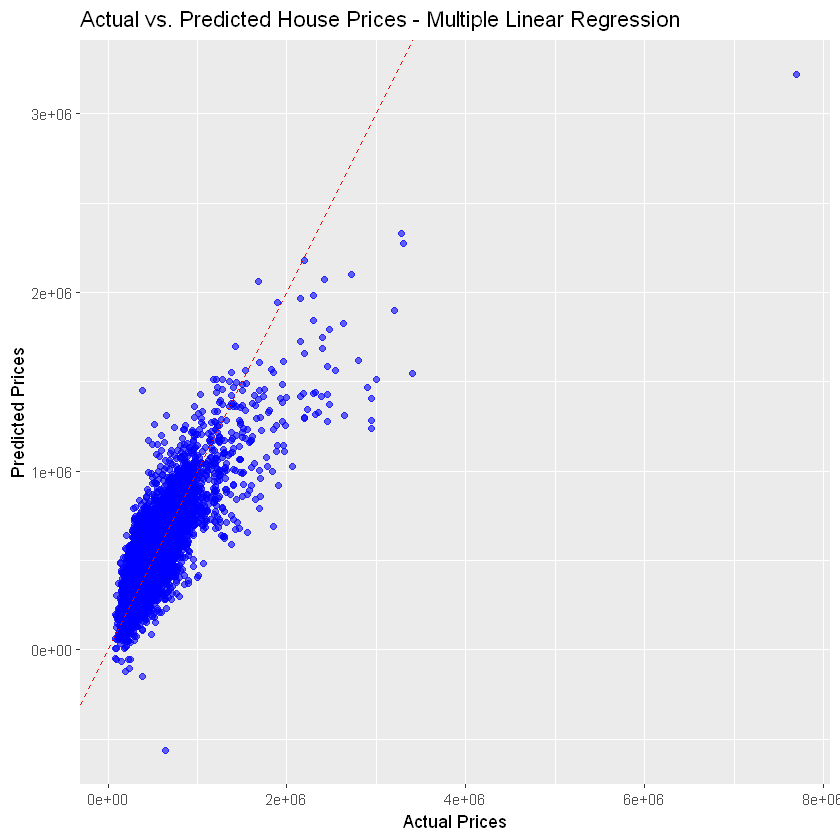

In [9]:
plot_data <- data.frame(Actual_Prices = y_test, Predicted_Prices = y_pred_lr)

scatter_plot <- ggplot(plot_data, aes(x = Actual_Prices, y = Predicted_Prices)) +
                geom_point(alpha = 0.6,color='blue') +
                geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
                labs(x = "Actual Prices", y = "Predicted Prices", title = "Actual vs. Predicted House Prices - Multiple Linear Regression")
print(scatter_plot)


In [10]:
y_train_pred_lr <- predict(lr_model, newdata = as.data.frame(X_train_scaled))

y_test_pred_lr <- predict(lr_model, newdata = as.data.frame(X_test_scaled))


Warning message:
"package 'gridExtra' was built under R version 4.3.3"


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


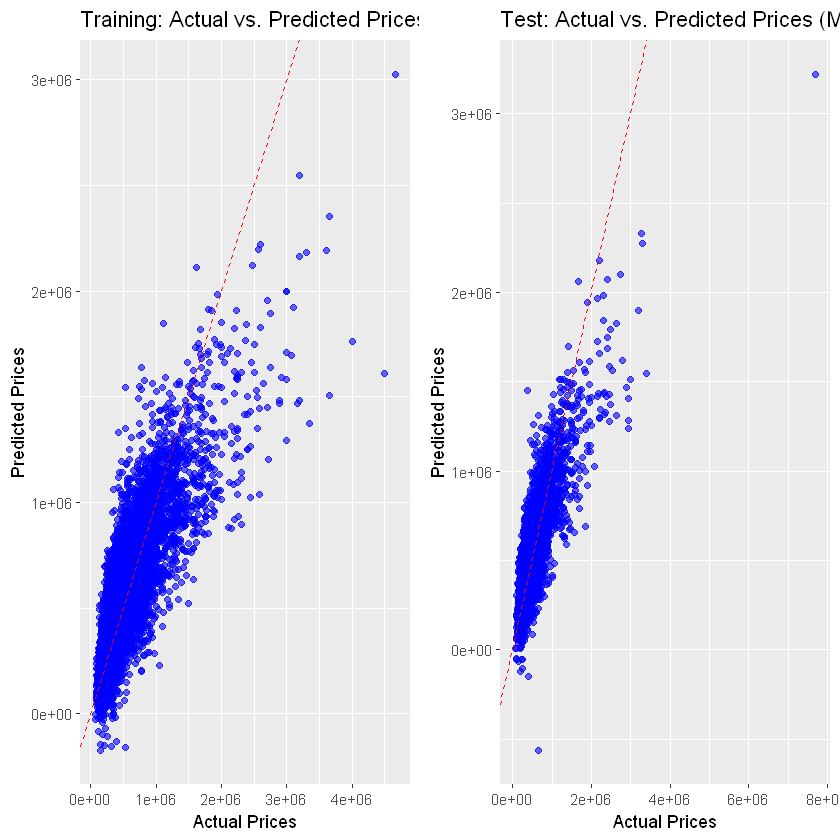

In [11]:
library(ggplot2)
library(gridExtra)

train_plot_data_lr <- data.frame(Actual_Prices = y_train, Predicted_Prices = y_train_pred_lr)
test_plot_data_lr <- data.frame(Actual_Prices = y_test, Predicted_Prices = y_test_pred_lr)

train_plot_lr <- ggplot(train_plot_data_lr, aes(x = Actual_Prices, y = Predicted_Prices)) +
                 geom_point(alpha = 0.6,color='blue') +
                 geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
                 labs(title = "Training: Actual vs. Predicted Prices (Multiple Linear Regression)", 
                      x = "Actual Prices", y = "Predicted Prices")

test_plot_lr <- ggplot(test_plot_data_lr, aes(x = Actual_Prices, y = Predicted_Prices)) +
                geom_point(alpha = 0.6,color='blue') +
                geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
                labs(title = "Test: Actual vs. Predicted Prices (Multiple Linear Regression)", 
                     x = "Actual Prices", y = "Predicted Prices")


multiplot_lr <- grid.arrange(train_plot_lr, test_plot_lr, nrow = 1)
print(multiplot_lr)
